# Assignment No: 07

Name : Snehal Awadan
    
PRN : 240340128033
    
Module : NLP

# Q.1) find the tf-idf vectorized data: 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

### 1) 

In [2]:
sent1 = "The postman delivered the package to the wrong address."

sent2 = "I wrapped a beautiful present for my friend's birthday."

sent3 = "The delivery truck arrived late due to heavy traffic."

sent4 = "We need to check the shipping address before sending the order."

sent5 = "Online shopping offers a wide variety of products with fast delivery."

In [3]:
# create obj:
tfidf = TfidfVectorizer()

new = tfidf.fit_transform([sent1, sent2, sent3, sent4, sent4])
new

<5x28 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [4]:
# convert in into array:
new_data = new.toarray()
new_data;

In [5]:
df = pd.DataFrame(new_data, columns= tfidf.get_feature_names_out())
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,for,...,present,sending,shipping,the,to,traffic,truck,we,wrapped,wrong
0,0.242571,0.00000,0.000000,0.000000,0.000000,0.000000,0.362202,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.612175,0.204058,0.00000,0.00000,0.000000,0.000000,0.362202
1,0.000000,0.00000,0.377964,0.000000,0.377964,0.000000,0.000000,0.00000,0.00000,0.377964,...,0.377964,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.377964,0.000000
2,0.000000,0.36191,0.000000,0.000000,0.000000,0.000000,0.000000,0.36191,0.36191,0.000000,...,0.000000,0.000000,0.000000,0.203894,0.203894,0.36191,0.36191,0.000000,0.000000,0.000000
3,0.260845,0.00000,0.000000,0.314236,0.000000,0.314236,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.314236,0.314236,0.438861,0.219431,0.00000,0.00000,0.314236,0.000000,0.000000
4,0.260845,0.00000,0.000000,0.314236,0.000000,0.314236,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.314236,0.314236,0.438861,0.219431,0.00000,0.00000,0.314236,0.000000,0.000000


# Q. 2) spam_message.csv


# 1. Read the file

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('spam_messages.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 2. Seperate input and output data

In [8]:
# input:
x = df['Message']

# output:
y = df['Category']


# 3. Explore the output data

<Axes: xlabel='Category', ylabel='count'>

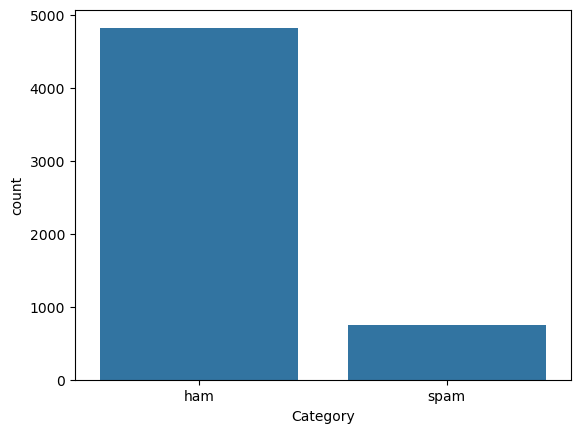

In [9]:
# Check labels are balanced or not
sns.countplot(x = y)

In [10]:
# Find the count of y:
y.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2c9f56f3610>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

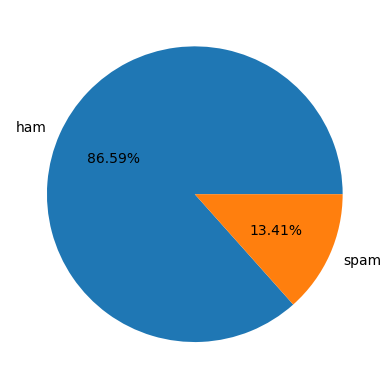

In [11]:
# draw a pie - chart:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct= '%2.2f%%')

# 4. Prepare and vectorize the data

In [12]:
# read statement from the file:
sent = df.loc[100, 'Message']
sent

"Please don't text me anymore. I have nothing else to say."

In [13]:
swords = stopwords.words('english')
ps = PorterStemmer()

In [14]:
# Create one function:

def clean_text(sent):
        # apply tokenization:
    tokens1 = word_tokenize(sent)
    
    # remove punct:
    tokens2 = [token for token in  tokens1 if token.isalnum()]
    
    # remove stopwords:
    tokens3 = [token for token in tokens2 if token.lower() not in swords]
    
    # stemming:
    tokens4 = [ps.stem(token) for token in tokens3] 
    
    return tokens4

# call the function and pass the sent:
clean_text(sent)

['pleas', 'text', 'anymor', 'noth', 'els', 'say']

In [15]:
# Pass all the corpus:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [16]:
#create object
tfidf = TfidfVectorizer(analyzer=clean_text)

#apply
x_new = tfidf.fit_transform(x)
x_new

<5572x6852 sparse matrix of type '<class 'numpy.float64'>'
	with 47518 stored elements in Compressed Sparse Row format>

# 5. Cross validate the data

In [17]:
#seprate the training and testing data

x_train,x_test,y_train,y_test = train_test_split(x_new,y,random_state=0)


# 6. Build the Decision Tree model for classification

In [18]:
from sklearn.tree import DecisionTreeClassifier

# create obj:
dt = DecisionTreeClassifier(random_state=0)

# fit the data:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

# 7. Evaluate the performance of algorithm

In [19]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [20]:
y_pred = dt.predict(x_test)

accuracy_score(y_test, y_pred)

0.9583632447954056

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      1208
        spam       0.83      0.86      0.85       185

    accuracy                           0.96      1393
   macro avg       0.91      0.92      0.91      1393
weighted avg       0.96      0.96      0.96      1393



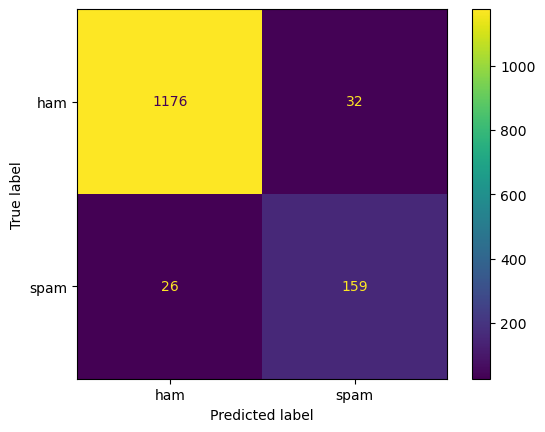

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# 8. Download the file sample.csv which contains the unknown mails. Predict the category of these mails.

In [23]:
f = open('sample.csv')

In [24]:
data = f.readlines()
data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [25]:
res = tfidf.transform(data)
dt.predict(res)

array(['ham', 'spam', 'ham'], dtype=object)